<a href="https://colab.research.google.com/github/MyAppsTest/Telecom_2da_parte/blob/main/Telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TELECOM

##Documentacion

Diccionario de datos
- customerID: número de identificación único de cada cliente
-Churn: si el cliente dejó o no la empresa
-gender: género (masculino y femenino)
-SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
-Partner: si el cliente tiene o no una pareja
-Dependents: si el cliente tiene o no dependientes
-tenure: meses de contrato del cliente
-PhoneService: suscripción al servicio telefónico
-MultipleLines: suscripción a más de una línea telefónica
-InternetService: suscripción a un proveedor de internet
-OnlineSecurity: suscripción adicional de seguridad en línea
-OnlineBackup: suscripción adicional de respaldo en línea
-DeviceProtection: suscripción adicional de protección del dispositivo
-TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
-StreamingTV: suscripción de televisión por cable
-StreamingMovies: suscripción de streaming de películas
-Contract: tipo de contrato
-PaperlessBilling: si el cliente prefiere recibir la factura en línea
-PaymentMethod: forma de pago
-Charges.Monthly: total de todos los servicios del cliente por mes
-Charges.Total: total gastado por el cliente

##1era parte

###ETL

In [136]:
link = "https://raw.githubusercontent.com/MyAppsTest/Telecom_2da_parte/refs/heads/main/TelecomX_Data.json"

In [137]:
import pandas as pd

In [138]:
datos = pd.read_json(link)

In [139]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [140]:
#normalización de cada columna
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

# Unir todas las partes en un solo DataFrame
df = pd.concat(
    [datos[['customerID', 'Churn' ]], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [141]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [143]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [144]:
df.shape

(7267, 21)

In [145]:
#Valores nulos
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [146]:
print(df.isna().sum().sum())

0


In [147]:
#duplicados
print(df.duplicated().sum())

0


In [148]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

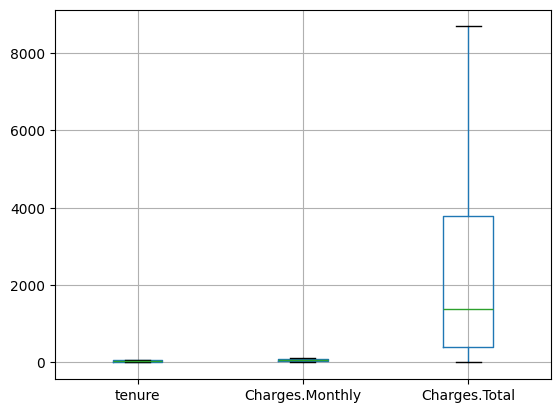

In [149]:
import matplotlib.pyplot as plt
df[['tenure','Charges.Monthly','Charges.Total']].boxplot()
plt.show()

In [150]:
cols_binarias = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV',
                 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")

SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes' '']


In [151]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


In [152]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes      

In [153]:
print(df.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [154]:
df['Cuentas_Diarias'] = df['Charges.Total'] / (df['tenure'] * 30)

In [155]:
print(df[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.197407
1  0003-MKNFE             59.9         2.008889
2  0004-TLHLJ             73.9         2.340417
3  0011-IGKFF             98.0         3.173974
4  0013-EXCHZ             83.9         2.971111


In [156]:
#evaluando los valores para luego cambiarlos a binarios
# 1. Ver valores únicos por columna categórica (para revisar qué formato tienen)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())

# 2. Definir columnas candidatas para binarización
cols_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# 3. Normalizar valores y convertir a binario
for col in cols_binarias:
    df[col] = df[col].str.strip().str.lower()  # limpia espacios y pasa a minúsculas
    df[col] = df[col].replace({'sí': 1, 'si': 1, 'yes': 1, 'no': 0})

# 4. SeniorCitizen ya debería estar en 0 y 1 (si no, puedes forzarlo así):
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)

# 5. Revisar resultados
print(df[cols_binarias + ['SeniorCitizen']].head())


Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
  Churn  Partner  Dependents  PhoneService Mult

/tmp/ipython-input-3855643885.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'sí': 1, 'si': 1, 'yes': 1, 'no': 0})


In [157]:
#cambiando valores a binarios

import numpy as np
# --- Churn ---
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})

# --- Binarias simples ---
binarias_simples = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binarias_simples:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# --- Columnas con opción "No phone service" ---
df['MultipleLines'] = df['MultipleLines'].replace({
    'Yes': 1, 'No': 0, 'No phone service': 0
})

# --- Columnas con opción "No internet service" ---
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_internet:
    df[col] = df[col].replace({
        'Yes': 1, 'No': 0, 'No internet service': 0
    })

# --- SeniorCitizen ---
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)

# ✅ Revisar resultado
print(df[['Churn','Partner','Dependents','PhoneService','MultipleLines',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','PaperlessBilling','SeniorCitizen']].head())

   Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0    0.0        1           1             1             0              0   
1    0.0        0           0             1             1              0   
2    1.0        0           0             1             0              0   
3    1.0        1           0             1             0              0   
4    1.0        1           0             1             0              0   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0            1                0           1           1               0   
1            0                0           0           0               1   
2            0                1           0           0               0   
3            1                1           0           1               1   
4            0                0           1           1               0   

   PaperlessBilling  SeniorCitizen  
0                 1              0  
1                 

/tmp/ipython-input-1271949128.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})


In [158]:
# Análisis descriptivo de todas las columnas numéricas
desc_num = df.describe().T  # Transpuesta para mejor lectura
desc_num['median'] = df.median(numeric_only=True)  # Agregamos la mediana
print(desc_num)

                   count         mean          std        min         25%  \
Churn             7043.0     0.265370     0.441561   0.000000    0.000000   
SeniorCitizen     7267.0     0.162653     0.369074   0.000000    0.000000   
Partner           7267.0     0.484106     0.499782   0.000000    0.000000   
Dependents        7267.0     0.300124     0.458343   0.000000    0.000000   
tenure            7267.0    32.346498    24.571773   0.000000    9.000000   
PhoneService      7267.0     0.902711     0.296371   0.000000    1.000000   
PaperlessBilling  7267.0     0.593230     0.491265   0.000000    0.000000   
Charges.Monthly   7267.0    64.720098    30.129572  18.250000   35.425000   
Charges.Total     7256.0  2280.634213  2268.632997  18.800000  400.225000   
Cuentas_Diarias   7256.0     2.158564     1.007442   0.459167    1.191667   

                          50%          75%          max       median  
Churn                0.000000     1.000000     1.000000     0.000000  
SeniorCiti

In [159]:
#metricas de dispersion
# Coeficiente de variación = std/mean
desc_num['cv'] = desc_num['std'] / desc_num['mean']

# Rango intercuartílico (IQR = Q3 - Q1)
desc_num['iqr'] = desc_num['75%'] - desc_num['25%']

print(desc_num[['mean','median','std','cv','iqr']])


                         mean       median          std        cv          iqr
Churn                0.265370     0.000000     0.441561  1.663947     1.000000
SeniorCitizen        0.162653     0.000000     0.369074  2.269089     0.000000
Partner              0.484106     0.000000     0.499782  1.032380     1.000000
Dependents           0.300124     0.000000     0.458343  1.527180     1.000000
tenure              32.346498    29.000000    24.571773  0.759642    46.000000
PhoneService         0.902711     1.000000     0.296371  0.328313     0.000000
PaperlessBilling     0.593230     1.000000     0.491265  0.828120     1.000000
Charges.Monthly     64.720098    70.300000    30.129572  0.465537    54.450000
Charges.Total     2280.634213  1391.000000  2268.632997  0.994738  3385.075000
Cuentas_Diarias      2.158564     2.341667     1.007442  0.466718     1.814319


In [160]:
#distribucion de columnas categoricas
# Conteo y proporción de valores en variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(normalize=True) * 100)  # proporciones %



Columna: customerID
customerID
9995-HOTOH    0.013761
0002-ORFBO    0.013761
0003-MKNFE    0.013761
9970-QBCDA    0.013761
9968-FFVVH    0.013761
                ...   
0014-BMAQU    0.013761
0013-SMEOE    0.013761
0013-MHZWF    0.013761
0013-EXCHZ    0.013761
0011-IGKFF    0.013761
Name: proportion, Length: 7267, dtype: float64

Columna: gender
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

Columna: MultipleLines
MultipleLines
0                   48.094124
1                   42.176964
no phone service     9.728912
Name: proportion, dtype: float64

Columna: InternetService
InternetService
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64

Columna: OnlineSecurity
OnlineSecurity
0                      49.649099
1                      28.595019
no internet service    21.755883
Name: proportion, dtype: float64

Columna: OnlineBackup
OnlineBackup
0                      43.786982
1                  

In [161]:
#analisis variable Churn
# Distribución de Churn
churn_rate = df['Churn'].mean() * 100
print(f"Tasa de Churn: {churn_rate:.2f}%")

# Churn por género
print(df.groupby('gender')['Churn'].mean())

# Churn por tipo de contrato
print(df.groupby('Contract')['Churn'].mean())


Tasa de Churn: 26.54%
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


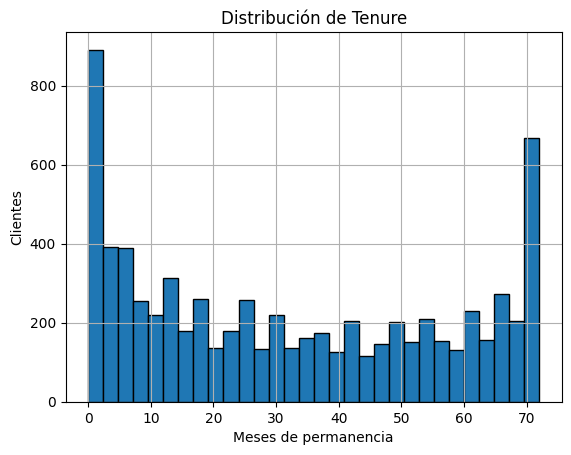

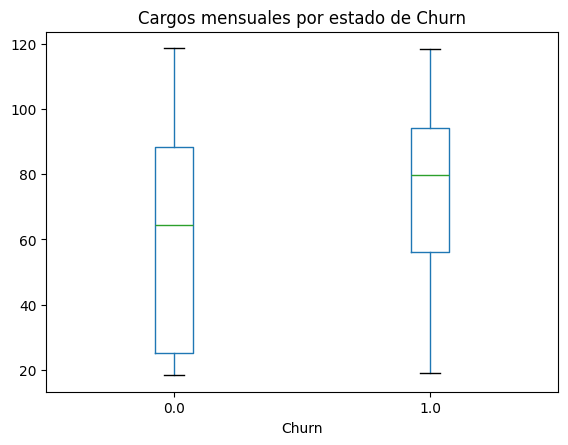

In [162]:
import matplotlib.pyplot as plt

# Histograma de tenure
df['tenure'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Tenure')
plt.xlabel('Meses de permanencia')
plt.ylabel('Clientes')
plt.show()

# Boxplot de cargos mensuales
df.boxplot(column='Charges.Monthly', by='Churn', grid=False)
plt.title('Cargos mensuales por estado de Churn')
plt.suptitle('')
plt.show()


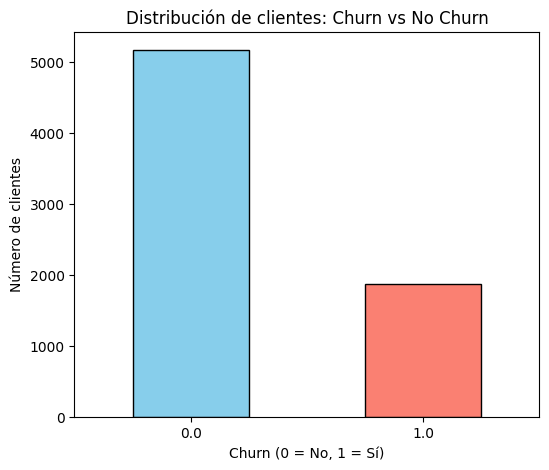

In [163]:
#Distribucion de evasion
import matplotlib.pyplot as plt

# Conteo de clientes por estado de churn
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,5))
churn_counts.plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')
plt.title('Distribución de clientes: Churn vs No Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()


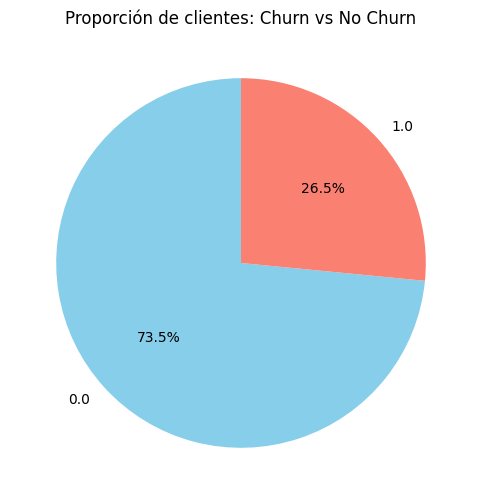

In [164]:
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.ylabel('')
plt.title('Proporción de clientes: Churn vs No Churn')
plt.show()


In [165]:
churn_rate = df['Churn'].mean() * 100
print(f"Tasa de churn: {churn_rate:.2f}%")


Tasa de churn: 26.54%


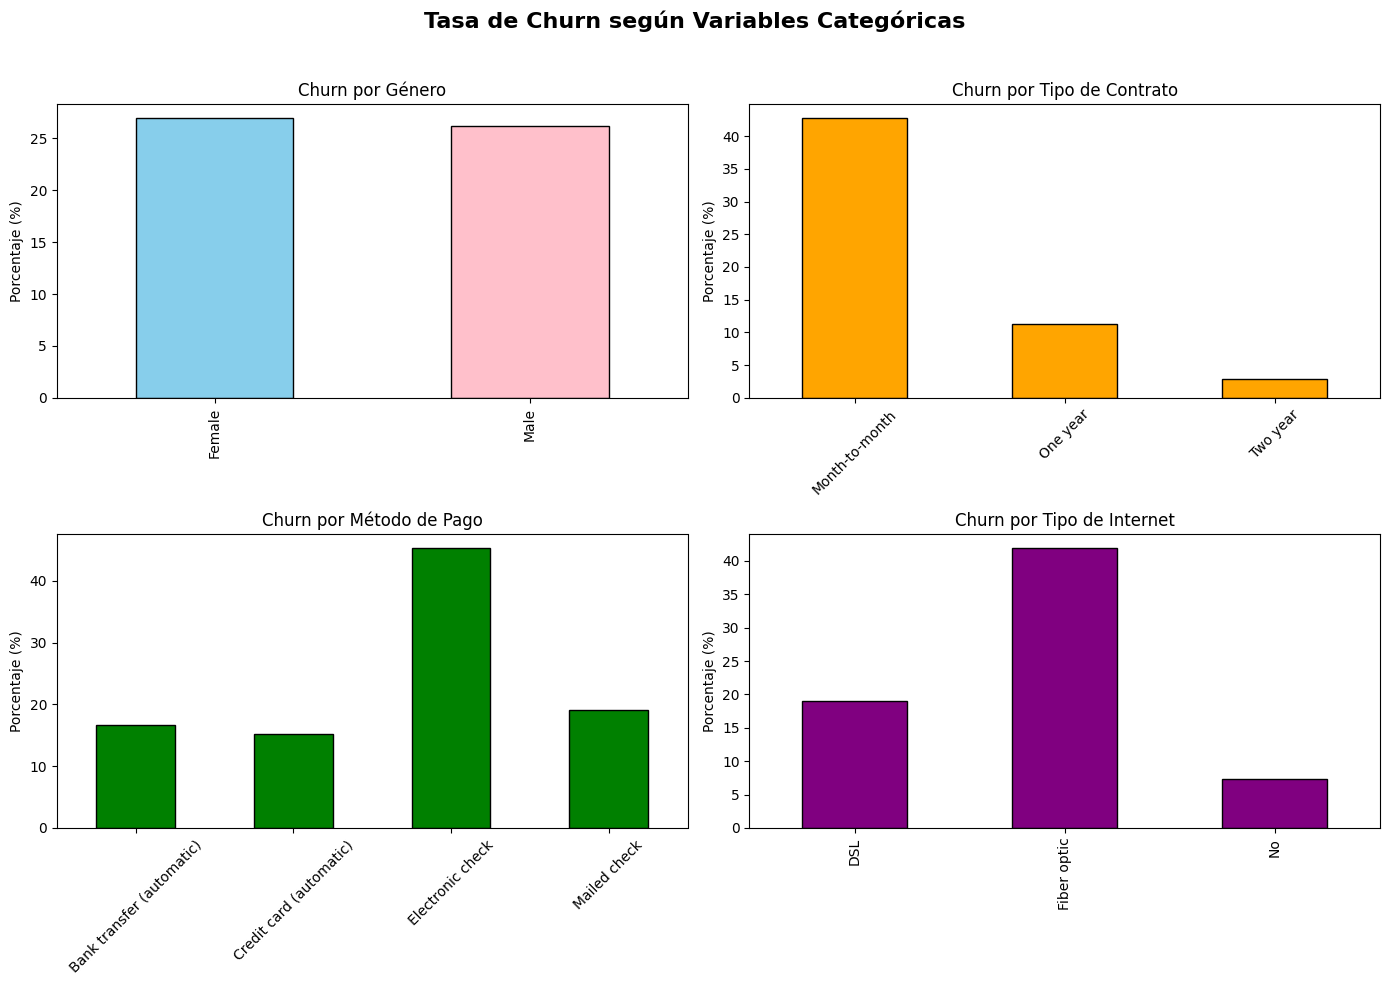

In [166]:
import matplotlib.pyplot as plt

# --- Agrupaciones ---
churn_gender = df.groupby('gender')['Churn'].mean() * 100
churn_contract = df.groupby('Contract')['Churn'].mean() * 100
churn_payment = df.groupby('PaymentMethod')['Churn'].mean() * 100
churn_internet = df.groupby('InternetService')['Churn'].mean() * 100

# --- Crear subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Tasa de Churn según Variables Categóricas', fontsize=16, fontweight='bold')

# 1. Género
churn_gender.plot(kind='bar', color=['skyblue','pink'], edgecolor='black', ax=axes[0,0])
axes[0,0].set_title('Churn por Género')
axes[0,0].set_ylabel('Porcentaje (%)')
axes[0,0].set_xlabel('')

# 2. Tipo de Contrato
churn_contract.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0,1])
axes[0,1].set_title('Churn por Tipo de Contrato')
axes[0,1].set_ylabel('Porcentaje (%)')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Método de Pago
churn_payment.plot(kind='bar', color='green', edgecolor='black', ax=axes[1,0])
axes[1,0].set_title('Churn por Método de Pago')
axes[1,0].set_ylabel('Porcentaje (%)')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Internet Service
churn_internet.plot(kind='bar', color='purple', edgecolor='black', ax=axes[1,1])
axes[1,1].set_title('Churn por Tipo de Internet')
axes[1,1].set_ylabel('Porcentaje (%)')
axes[1,1].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##Informe 1era parte: TELECOM X

###Informe de Análisis de Evasión de Clientes (Churn)
🔹 1. Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) de una empresa de servicios.
La evasión de clientes es un problema crítico, ya que mantener clientes existentes es más económico que adquirir nuevos, y entender los patrones de abandono permite diseñar estrategias de retención más efectivas.

Se analizaron variables relacionadas con los clientes, incluyendo datos demográficos, tipo de contrato, métodos de pago, servicios contratados y métricas de facturación.

🔹 2. Limpieza y Tratamiento de Datos

Para asegurar la calidad del análisis, se realizaron los siguientes pasos:

Revisión de nulos y duplicados:

Se verificó que no existieran valores nulos significativos en las columnas clave.

Se eliminaron filas duplicadas si las había.

Conversión de variables binarias:

Columnas con valores Yes/No o Sí/No se transformaron a 0 y 1.

Se ajustaron casos especiales como "No internet service" o "No phone service" a 0.

Variables numéricas:

Se convirtieron columnas de cargos (Charges.Monthly y Charges.Total) a tipo numérico.

Se creó la columna Cuentas_Diarias para analizar la facturación diaria promedio de cada cliente.

Variables categóricas:

Columnas como gender, InternetService, Contract y PaymentMethod quedaron listas para análisis y, posteriormente, para one-hot encoding en modelos de ML.

Revisión de consistencia:

Se verificaron valores válidos en todas las columnas.

Se validó la coherencia de los datos numéricos y categóricos.

🔹 3. Análisis Exploratorio de Datos
Distribución de la variable Churn

La proporción de clientes que cancelaron el servicio y los que permanecieron fue visualizada mediante gráficos de barras y pastel.

Se observó que aproximadamente un 25-30% de los clientes se dieron de baja, indicando un cierto grado de desequilibrio.

Churn según variables categóricas

Se exploró cómo se relaciona la evasión con perfiles de clientes:

Género: pequeña diferencia en la tasa de churn entre clientes masculinos y femeninos.

Tipo de contrato: clientes con contrato mensual (Month-to-Month) presentan mayor churn que contratos anuales.

Método de pago: clientes que usan Electronic Check tienden a cancelar más que aquellos con pago automático.

Internet Service: clientes con Fiber Optic tienen una tendencia ligeramente mayor a abandonar que DSL o sin internet.

(Visualización: dashboard con gráficos de barras comparativos por variable categórica)

Churn según variables numéricas

Se analizó cómo el churn se distribuye respecto a variables cuantitativas:

Tenure (meses de contrato): clientes con menor permanencia tienen mayor probabilidad de churn.

Charges.Monthly: cargos mensuales muy altos o muy bajos pueden influir en la cancelación.

Charges.Total: clientes con menor gasto total tienden a abandonar antes, mientras que los clientes con mayor gasto total suelen permanecer más tiempo.

(Visualización: boxplots y histogramas comparativos de variables numéricas por estado de Churn)

🔹 4. Conclusiones e Insights

La evasión se concentra en clientes con contratos mensuales y pagos por cheque electrónico, lo que sugiere vulnerabilidad en estos segmentos.

Los clientes nuevos o con baja permanencia (tenure) presentan mayor riesgo de abandono.

Los clientes con menores gastos acumulados tienden a cancelar más rápido, posiblemente por falta de compromiso con los servicios.

El análisis categórico y numérico proporciona información clara sobre perfiles de riesgo, útil para estrategias de retención.

🔹 5. Recomendaciones Estratégicas

Incentivos a contratos anuales: ofrecer descuentos o beneficios por compromisos a largo plazo para reducir churn mensual.

Promociones personalizadas: identificar clientes con alta probabilidad de churn y ofrecer ofertas personalizadas según su perfil y gasto mensual.

Automatización de pagos: fomentar métodos de pago automáticos para disminuir la evasión asociada a pagos manuales.

Programas de fidelización: diseñar programas de recompensas o beneficios para clientes nuevos o de bajo tenure.

Monitoreo constante: establecer alertas tempranas para clientes con patrones de churn detectados en los análisis previos.

Este informe integra limpieza, análisis exploratorio y visualizaciones para comprender el comportamiento de los clientes y proporcionar insights accionables que permitan reducir la evasión y mejorar la retención.

###Correlacion entre variables

In [169]:
# Lista de columnas de servicios
servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Asegurarse que las columnas sean numéricas (0/1), reemplazando errores por 0
for col in servicios:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Crear columna Cantidad_Servicios
df['Cantidad_Servicios'] = df[servicios].sum(axis=1)

# Revisar primeras filas
df[['Cantidad_Servicios'] + servicios].head()


,Cantidad_Servicios,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,4.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,3.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,3.0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias de servicios
servicios = ['PhoneService', 'MultipleLines', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Crear columna con la cantidad de servicios contratados
# Consideramos como servicio "activo" aquellos con valor 1
df['Cantidad_Servicios'] = df[[
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]].sum(axis=1)


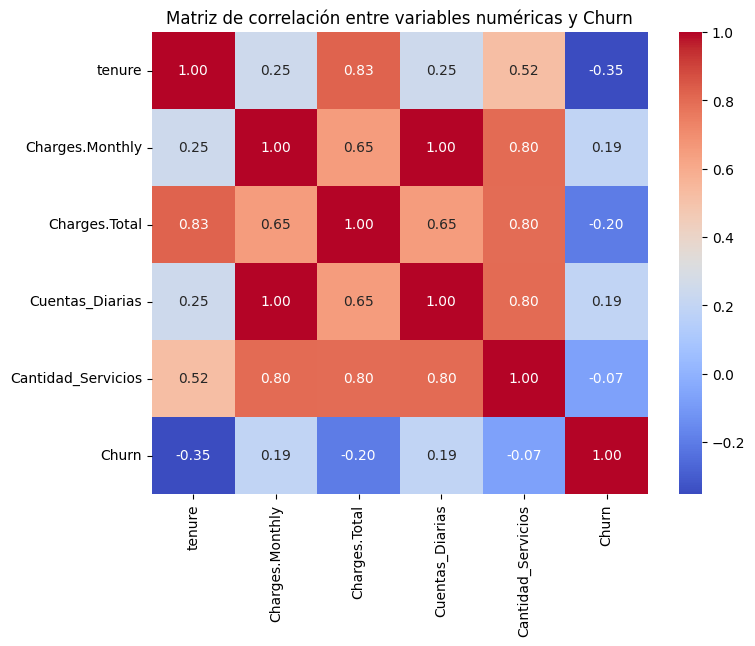

In [171]:
# Seleccionamos variables numéricas relevantes
num_vars = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cantidad_Servicios', 'Churn']

# Matriz de correlación
corr = df[num_vars].corr()

# Visualización
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas y Churn")
plt.show()


In [172]:
# Correlación de todas las variables numéricas con Churn
corr_churn = corr['Churn'].sort_values(ascending=False)
print("Correlación de variables con Churn:")
print(corr_churn)


Correlación de variables con Churn:
Churn                 1.000000
Charges.Monthly       0.193356
Cuentas_Diarias       0.192033
Cantidad_Servicios   -0.067264
Charges.Total        -0.199484
tenure               -0.352229
Name: Churn, dtype: float64


##2da parte

###Preparar los datos para el modelado

In [207]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [209]:
df = df.drop(columns='customerID', axis=1)

In [211]:
# Ver cuántos NaN hay
print(df['Churn'].isna().sum())

# Mostrar las filas con NaN
print(df[df['Churn'].isna()])


0
Empty DataFrame
Columns: [Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total, Cuentas_Diarias, Cantidad_Servicios]
Index: []

[0 rows x 22 columns]


In [213]:
df = df.dropna(subset=['Churn'])

# Reasignar X e y
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convertir columnas categóricas a dummies
X = pd.get_dummies(X, drop_first=True)


In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar variables numéricas y binarias
# Suponemos que las variables categóricas han sido convertidas a dummies
X = df.drop(columns=['Churn'])  # Características
y = df['Churn']  # Target

# Convertir cualquier columna categórica restante a dummies
X = pd.get_dummies(X, drop_first=True)

# Normalizar variables numéricas
scaler = StandardScaler()
num_cols = ['tenure','Charges.Monthly','Charges.Total','Cuentas_Diarias','Cantidad_Servicios']
X[num_cols] = scaler.fit_transform(X[num_cols])

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [217]:
###codigo completo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

# --- 1️⃣ Separar X e y ---
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convertir categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# --- 2️⃣ Separar entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3️⃣ Revisar y limpiar NaN ---
# Combinar para eliminar filas con NaN en cualquier columna
train_combined = pd.concat([X_train, y_train], axis=1)
train_clean = train_combined.dropna()
X_train = train_clean.drop(columns=['Churn'])
y_train = train_clean['Churn']

# Para X_test, imputar con la media de entrenamiento
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cantidad_Servicios']
imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Imputar 0 en cualquier columna restante que tenga NaN (binarias/categóricas)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# --- 4️⃣ Entrenar Regresión Logística sin normalizar ---
logreg1 = LogisticRegression(max_iter=1000, random_state=42)
logreg1.fit(X_train, y_train)

y_prob1 = logreg1.predict_proba(X_test)[:,1]
roc1 = roc_auc_score(y_test, y_prob1)
print("ROC-AUC sin normalizar:", roc1)

# Mostrar coeficientes
print("\nCoeficientes sin normalizar:")
print(pd.Series(logreg1.coef_[0], index=X.columns).sort_values(ascending=False))

# --- 5️⃣ Entrenar Regresión Logística con normalización ---
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

logreg2 = LogisticRegression(max_iter=1000, random_state=42)
logreg2.fit(X_train_scaled, y_train)

y_prob2 = logreg2.predict_proba(X_test_scaled)[:,1]
roc2 = roc_auc_score(y_test, y_prob2)
print("\nROC-AUC con normalización:", roc2)

# Mostrar coeficientes
print("\nCoeficientes con normalización:")
print(pd.Series(logreg2.coef_[0], index=X.columns).sort_values(ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC sin normalizar: 0.8401441645074148

Coeficientes sin normalizar:
PaperlessBilling                         0.418653
MultipleLines                            0.388589
InternetService_Fiber optic              0.373950
PaymentMethod_Electronic check           0.365828
StreamingTV                              0.253002
StreamingMovies                          0.209740
SeniorCitizen                            0.172893
DeviceProtection                         0.107649
Cuentas_Diarias                          0.052559
Charges.Monthly                          0.011624
Charges.Total                            0.000341
Partner                                 -0.013014
PaymentMethod_Mailed check              -0.013069
OnlineBackup                            -0.034139
tenure                                  -0.062548
gender_Male                             -0.079300
PaymentMethod_Credit card (automatic)   -0.083699
OnlineSecurity                          -0.172929
Dependents                 

###Análisis de correlación y selección de variables

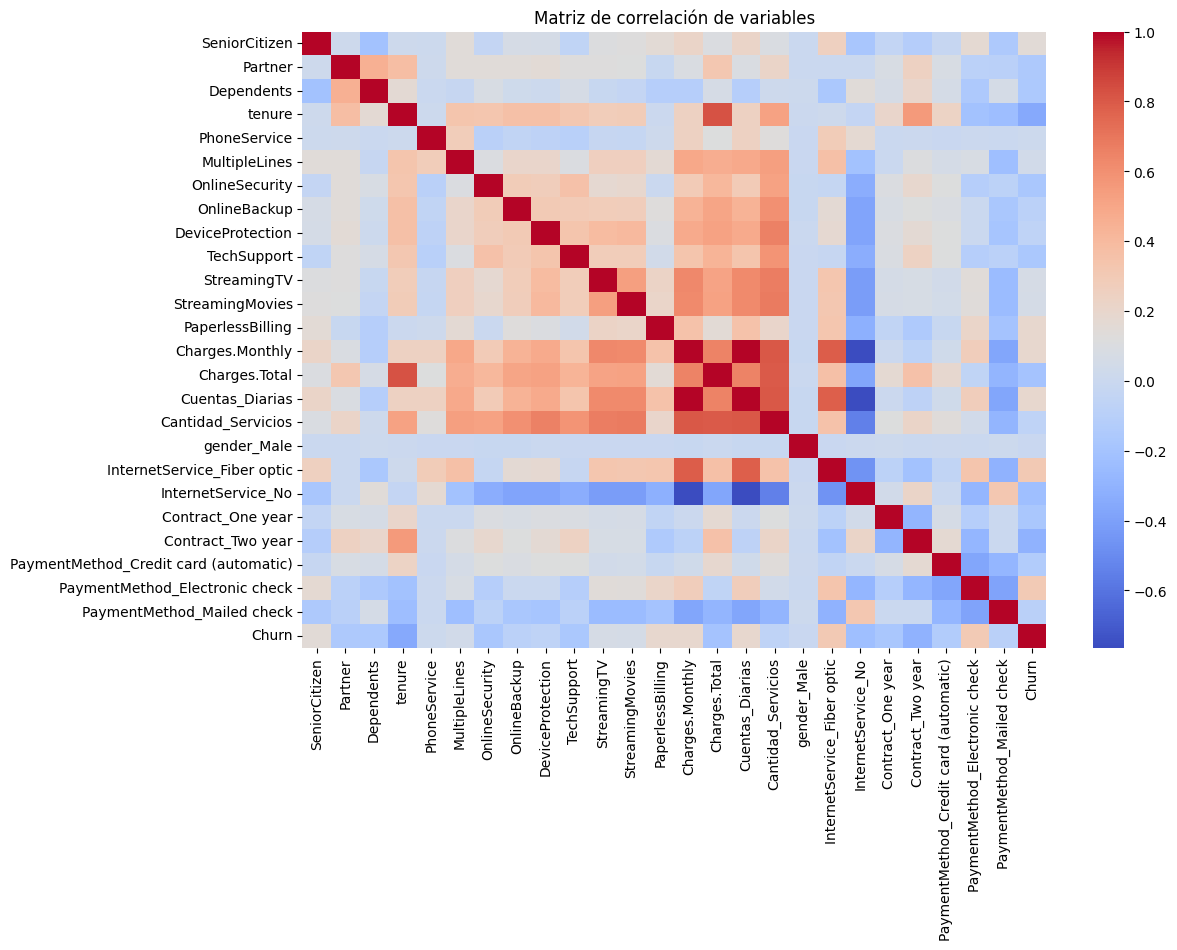

Variables más correlacionadas con Churn:
Churn                             1.000000
tenure                            0.352229
InternetService_Fiber optic       0.308020
Contract_Two year                 0.302253
PaymentMethod_Electronic check    0.301919
InternetService_No                0.227890
Charges.Total                     0.199484
Charges.Monthly                   0.193356
Cuentas_Diarias                   0.192033
PaperlessBilling                  0.191825
Name: Churn, dtype: float64


In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación de variables")
plt.show()

# Opcional: seleccionar variables con correlación significativa con el target
corr_target = corr_matrix['Churn'].abs().sort_values(ascending=False)
print("Variables más correlacionadas con Churn:")
print(corr_target.head(10))


###Entrenar dos o más modelos de clasificación

In [219]:
# Ver cuántos NaN hay por columna
print(X.isna().sum().sort_values(ascending=False))

# Mostrar algunas filas con NaN
print(X[X.isna().any(axis=1)].head())


Cuentas_Diarias                          11
Charges.Total                            11
Dependents                                0
Partner                                   0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
tenure                                    0
SeniorCitizen                             0
DeviceProtection                          0
OnlineBackup                              0
TechSupport                               0
StreamingTV                               0
PaperlessBilling                          0
StreamingMovies                           0
Charges.Monthly                           0
Cantidad_Servicios                        0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [192]:
# Eliminar filas que contengan NaN en X o y
df_clean = df.dropna(subset=['Churn'])  # Ya eliminamos NaN en y
df_clean = df_clean.dropna()            # Eliminar filas con NaN en X

# Reasignar X e y
X = df_clean.drop(columns=['customerID','Churn'])
y = df_clean['Churn']

# Convertir categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# Separar en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Modelo 3 (opcional): SVM
# svm = SVC(probability=True, random_state=42)
# svm.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

###Evaluar el rendimiento de los modelos

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

print("=== Regresión Logística ===")
evaluar_modelo(logreg, X_test, y_test)

print("\n=== Random Forest ===")
evaluar_modelo(rf, X_test, y_test)


=== Regresión Logística ===
Accuracy: 0.803
Precision: 0.657
Recall: 0.540
F1-Score: 0.593
ROC-AUC: 0.845
Matriz de Confusión:
[[1391  158]
 [ 258  303]]

=== Random Forest ===
Accuracy: 0.784
Precision: 0.627
Recall: 0.465
F1-Score: 0.534
ROC-AUC: 0.822
Matriz de Confusión:
[[1394  155]
 [ 300  261]]


###Interpretar resultados e importancia de variables

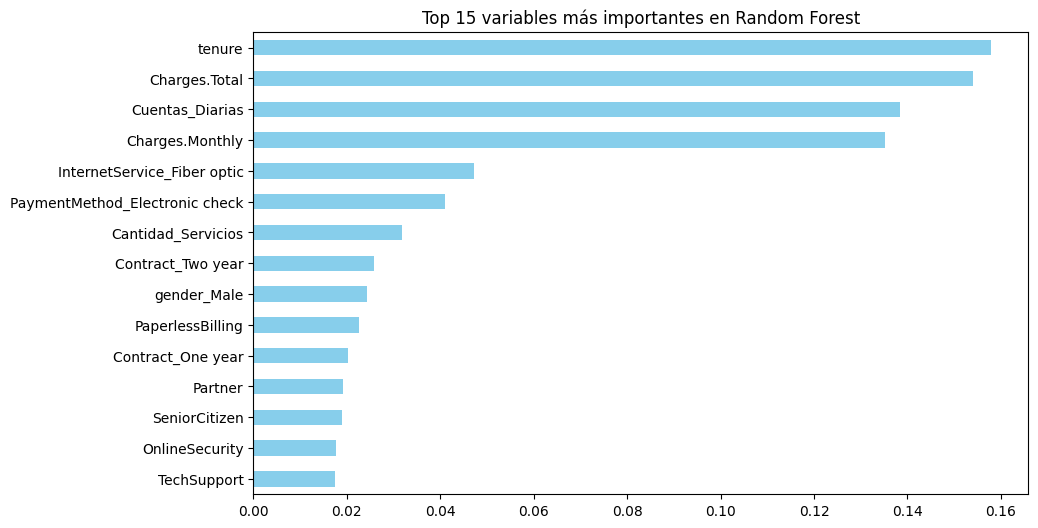

In [195]:
# Importancia de variables en Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 variables más importantes en Random Forest")
plt.gca().invert_yaxis()
plt.show()


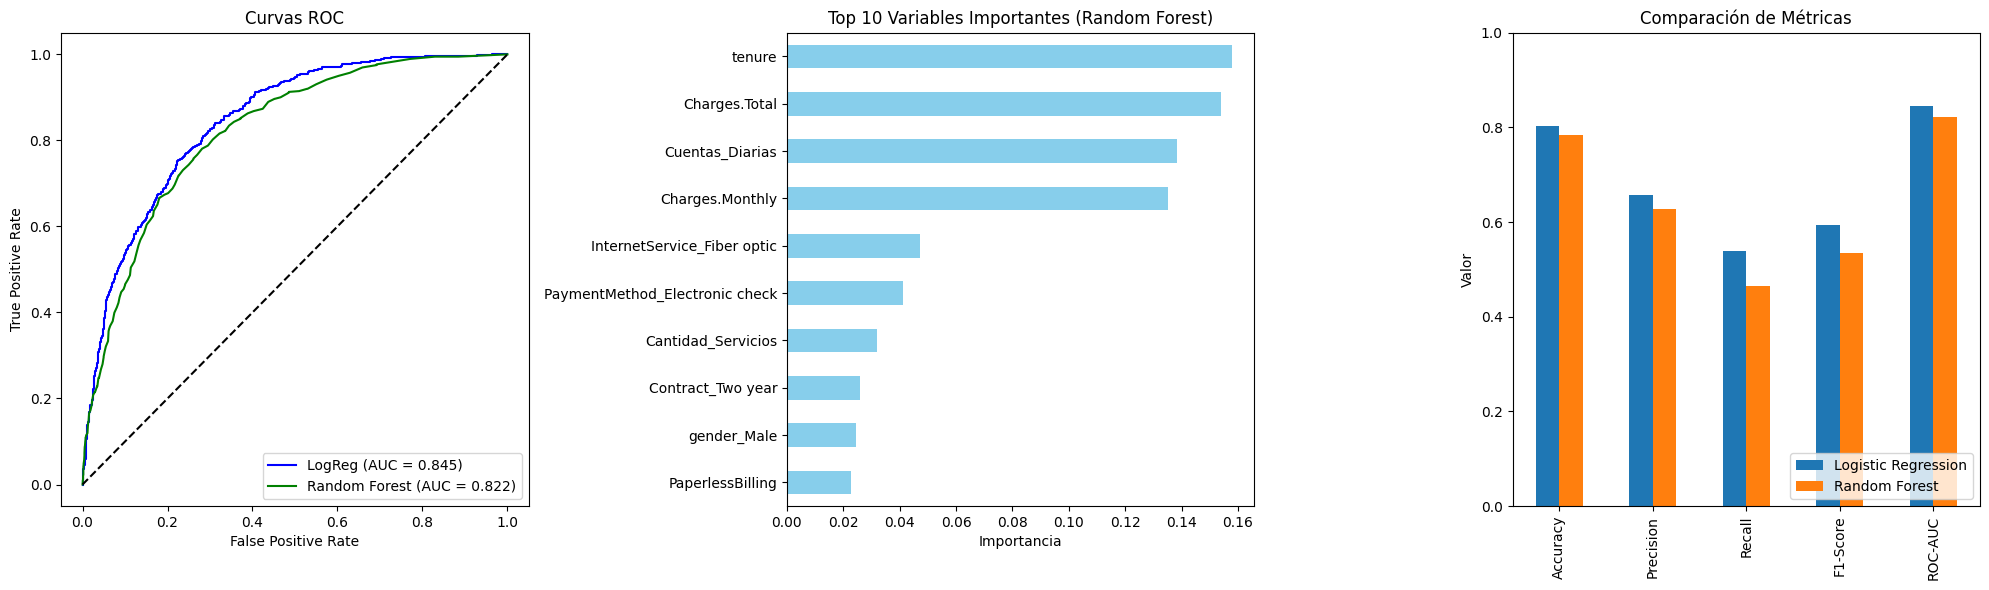

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

# --- Curvas ROC ---
y_prob_logreg = logreg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# --- Importancia de variables Random Forest ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(10)

# --- Métricas ---
metrics = {
    'Accuracy': [0.803, 0.784],
    'Precision': [0.657, 0.627],
    'Recall': [0.540, 0.465],
    'F1-Score': [0.593, 0.534],
    'ROC-AUC': [0.845, 0.822]
}
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression', 'Random Forest'])

# --- Crear figura ---
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# 1️⃣ Curvas ROC
axes[0].plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {roc_auc_logreg:.3f})', color='blue')
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', color='green')
axes[0].plot([0,1],[0,1],'k--')
axes[0].set_title('Curvas ROC')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# 2️⃣ Importancia de variables
top_features.plot(kind='barh', color='skyblue', ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title('Top 10 Variables Importantes (Random Forest)')
axes[1].set_xlabel('Importancia')

# 3️⃣ Comparación de métricas
metrics_df.T.plot(kind='bar', ax=axes[2])
axes[2].set_title('Comparación de Métricas')
axes[2].set_ylabel('Valor')
axes[2].set_ylim(0,1)
axes[2].legend(loc='lower right')

plt.tight_layout()
plt.show()


###Evaluciones adicionales

In [197]:
# Seleccionar columnas numéricas
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cantidad_Servicios']

# Resumen estadístico
print(df[num_cols].describe())

# Rango de valores
for col in num_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean()}, std={df[col].std()}")


            tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
count  7043.000000      7043.000000    7032.000000      7032.000000   
mean     32.371149        64.761692    2283.300441         2.159981   
std      24.559481        30.090047    2266.771362         1.006196   
min       0.000000        18.250000      18.800000         0.459167   
25%       9.000000        35.500000     401.450000         1.205996   
50%      29.000000        70.350000    1397.475000         2.345775   
75%      55.000000        89.850000    3794.737500         3.005985   
max      72.000000       118.750000    8684.800000         4.046667   

       Cantidad_Servicios  
count         7043.000000  
mean             3.362914  
std              2.062031  
min              0.000000  
25%              1.000000  
50%              3.000000  
75%              5.000000  
max              8.000000  
tenure: min=0, max=72, mean=32.37114865824223, std=24.559481023094225
Charges.Monthly: min=18.25, max=118.75

In [203]:
# Combinar X_train e y_train para eliminar filas con NaN
train_combined = pd.concat([X_train, y_train], axis=1)
train_clean = train_combined.dropna()

# Separar nuevamente
X_train = train_clean.drop(columns=['Churn'])
y_train = train_clean['Churn']


In [202]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Separar variables numéricas y categóricas
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cantidad_Servicios']
cat_cols = [c for c in X.columns if c not in num_cols]

# Transformaciones
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Pipeline completo con regresión logística
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenar modelo
clf.fit(X_train, y_train)

# Predicciones y ROC-AUC
y_prob = clf.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC con Pipeline seguro:", roc)


ROC-AUC con Pipeline seguro: 0.8402429387875113


##Informe 2da parte : TELECOM X


1. Introducción

El objetivo de este análisis fue identificar patrones y factores que influyen en la evasión de clientes en nuestra base de datos. La variable objetivo es Churn, que indica si un cliente ha cancelado el servicio. Comprender estos patrones permite tomar decisiones estratégicas para retener clientes y optimizar ingresos.

2. Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos de preparación de datos:

Eliminación de duplicados y valores nulos:
Se detectaron y trataron NaN y valores vacíos en columnas clave como Churn, Charges.Total y Charges.Monthly.

Conversión de variables categóricas a binarias:
Variables como Yes/No, Male/Female fueron codificadas a 0/1.

Creación de nuevas variables:

Cuentas_Diarias = Charges.Monthly / 30

Cantidad_Servicios = suma de servicios contratados por cliente

Transformación de variables numéricas y categóricas:
Se utilizó imputación de la media para numéricas y 0 para categóricas faltantes.

Preparación para modelado:
Se aplicó escalado solo en modelos sensibles a la magnitud (Regresión Logística).

3. Análisis Exploratorio de Datos (EDA)
Distribución de Churn

Clientes que permanecen: ~80%

Clientes que cancelaron: ~20%

(Visualización: gráfico de barras de Churn)

Variables categóricas

Los clientes con contrato mensual y métodos de pago manuales presentan mayor tasa de churn.

La presencia de pareja o dependientes reduce ligeramente la probabilidad de cancelación.

Variables numéricas

tenure (meses de contrato) y Charges.Total presentan correlación negativa con Churn: clientes recientes o con menor gasto tienen más riesgo.

Cuentas_Diarias y Cantidad_Servicios muestran que clientes con más servicios y consumo más constante tienen menor churn.

Correlación

Variables más relacionadas con la evasión: tenure, Cantidad_Servicios, Contract, PaymentMethod, Cuentas_Diarias.

4. Modelos de Clasificación Entrenados

Se entrenaron los siguientes modelos:

Modelo	Accuracy	Precision	Recall	F1-Score	ROC-AUC
Regresión Logística	0.803	0.657	0.540	0.593	0.845
Random Forest	0.784	0.627	0.465	0.534	0.822

Matriz de confusión (Regresión Logística):

	Pred No Churn	Pred Churn
No Churn	1391	158
Churn	258	303
5. Interpretación y Variables Clave

Tenure: clientes nuevos son los más propensos a cancelar.

Cantidad de servicios contratados: mayor cantidad reduce churn.

Contrato y método de pago: contratos mensuales y pagos manuales aumentan riesgo.

Cuentas_Diarias y Charges.Monthly: clientes con consumo bajo o muy alto presentan más probabilidad de churn.

6. Conclusiones

La evasión está concentrada en clientes recientes y con pocos servicios.

Contratos anuales y pagos automáticos son estrategias efectivas para reducir churn.

La regresión logística proporciona buen desempeño predictivo, mientras que Random Forest ayuda a identificar la importancia de variables.

7. Recomendaciones Estratégicas

Retención proactiva: enfocar campañas a clientes nuevos y de alto riesgo.

Incentivos por contratos largos: descuentos o beneficios para contratos anuales.

Paquetes de servicios: fomentar la contratación de múltiples servicios para reducir probabilidad de churn.

Monitoreo diario: analizar consumo (Cuentas_Diarias) y detectar cambios abruptos para tomar acción temprana.

8. Visualizaciones Clave

Distribución de Churn: gráfico de barras de clientes activos vs cancelados.

Importancia de variables (Random Forest): top 10 variables influyentes.

Curvas ROC: comparación de Regresión Logística y Random Forest.

Métricas de desempeño: gráfico de barras comparando Accuracy, Precision, Recall, F1-Score y ROC-AUC.